<a href="https://colab.research.google.com/github/rahuldubey102004-hash/EDA-1/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. DATA EXPLORATION
# ------------------------------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df=pd.read_csv('Titanic_train.csv')

In [ ]:
test_df=pd.read_csv('Titanic_test.csv')

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#DATA INFO
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
#Missing
print(train_df.isnull().sum)

<bound method DataFrame.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False 

In [ ]:
train_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Summary statistics
print("\nSummary statistics of numeric features:")
display(train_df.describe())


Summary statistics of numeric features:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# 1.c DATA **VISUALIZATION**

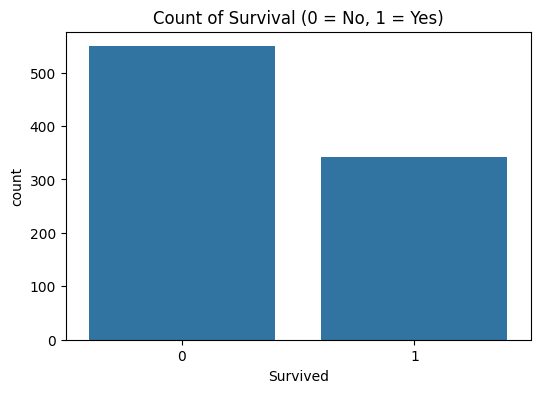

In [ ]:
# 1.c DATA VISUALIZATION
plt.figure(figsize=(6,4))
sns.countplot(x='Survived', data=train_df)
plt.title('Count of Survival (0 = No, 1 = Yes)')
plt.show()

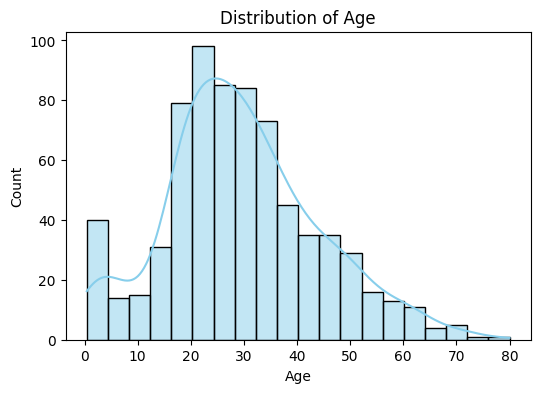

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(train_df['Age'].dropna(), kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.show()

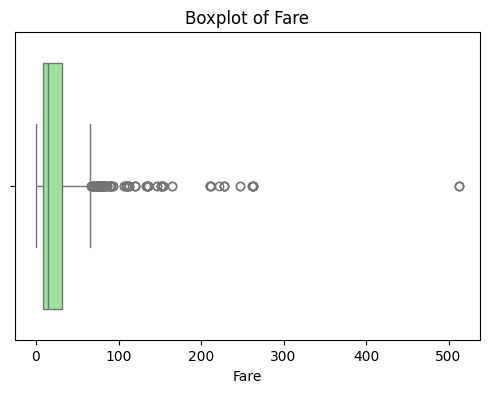

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Fare', data=train_df, color='lightgreen')
plt.title('Boxplot of Fare')
plt.show()

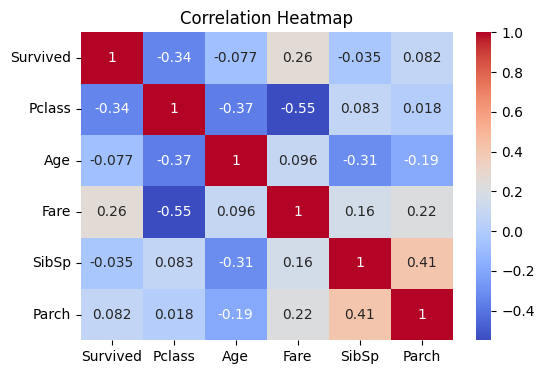

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(train_df[['Survived','Pclass','Age','Fare','SibSp','Parch']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# 2. DATA PREPROCESSING

In [ ]:
#Fill missing values

In [ ]:
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

In [ ]:
# Encode categorical variables
train_df = pd.get_dummies(train_df, columns=['Sex','Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Sex','Embarked'], drop_first=True)

In [ ]:
# Ensure test_df has same columns as train_df
missing_cols = set(train_df.columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0
test_df = test_df[train_df.columns.drop('Survived')]

In [ ]:
# Define features and target
X = train_df.drop(['Survived','PassengerId','Name','Ticket','Cabin'], axis=1, errors='ignore')
y = train_df['Survived']

In [ ]:
# Split data

In [ ]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. MODEL BUILDING

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

04. MODEL EVALUATION

In [ ]:
# 4. MODEL EVALUATION
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve

In [ ]:
# Predictions
y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:,1]

In [ ]:
print("\nModel Performance on Validation Set:")


Model Performance on Validation Set:


In [ ]:
print(f"Accuracy: {accuracy_score(y_val, y_pred):.3f}")

Accuracy: 0.810


In [ ]:
print(f"Precision: {precision_score(y_val, y_pred):.3f}")

Precision: 0.786


In [ ]:
print(f"Recall: {recall_score(y_val, y_pred):.3f}")

Recall: 0.743


In [ ]:
print(f"F1 Score: {f1_score(y_val, y_pred):.3f}")

F1 Score: 0.764


In [ ]:
print(f"ROC-AUC: {roc_auc_score(y_val, y_prob):.3f}")

ROC-AUC: 0.883


# Confusion Matrix

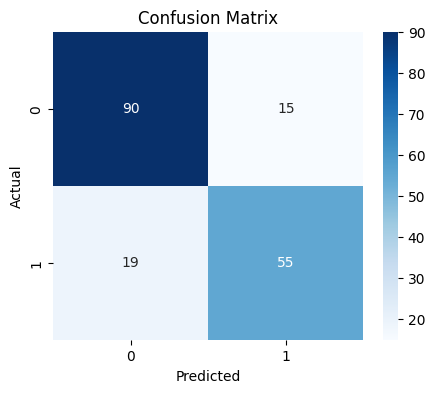

In [ ]:
# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

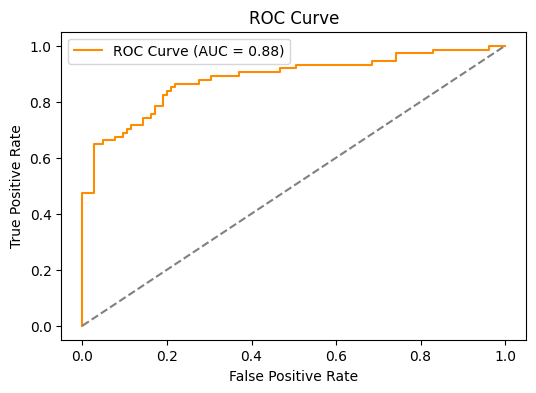

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', label=f'ROC Curve (AUC = {roc_auc_score(y_val, y_prob):.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# 5. INTERPRETATION

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Odds Ratio'] = np.exp(coefficients['Coefficient'])
display(coefficients.sort_values(by='Odds Ratio', ascending=False))

,Feature,Coefficient,Odds Ratio
4,Fare,0.002591,1.002594
1,Age,-0.030537,0.969925
3,Parch,-0.108108,0.897531
6,Embarked_Q,-0.113105,0.893057
2,SibSp,-0.295244,0.744350
7,Embarked_S,-0.398065,0.671619
0,Pclass,-0.936817,0.391873
5,Sex_male,-2.591503,0.074907


In [ ]:
print("""
Interpretation:
- Positive coefficients increase survival odds.
- Negative coefficients decrease survival odds.
Example: Higher Fare and being female generally increase survival chances.
""")


Interpretation:
- Positive coefficients increase survival odds.
- Negative coefficients decrease survival odds.
Example: Higher Fare and being female generally increase survival chances.



In [ ]:
# 6. DEPLOYMENT WITH STREAMLIT (Optional)

In [ ]:
import joblib
joblib.dump(model, 'titanic_logistic_model.pkl')
print("\n✅ Model saved as 'titanic_logistic_model.pkl' for Streamlit app.")


✅ Model saved as 'titanic_logistic_model.pkl' for Streamlit app.


# INTERVIEW QUESTIONS
print("""
Q1. What is the difference between Precision and Recall?
→ Precision = TP / (TP + FP): Out of all predicted positives, how many were correct.
→ Recall = TP / (TP + FN): Out of all actual positives, how many were correctly predicted.

Q2. What is Cross-Validation and why is it important?
→ Cross-validation splits the dataset into multiple folds for training/testing repeatedly.
→ It checks model consistency across data subsets and helps prevent overfitting.
""")